In [1]:
import pickle

In [3]:
with open('C:/armaan/Machine Learning/violence detection codes/train_features1.pkl', 'rb') as f:
    train_features = pickle.load(f)
    
with open('C:/armaan/Machine Learning/violence detection codes/test_features1.pkl', 'rb') as f:
    test_features = pickle.load(f)
    
with open('C:/armaan/Machine Learning/violence detection codes/val_features1.pkl', 'rb') as f:
    val_features = pickle.load(f)
    
with open('C:/armaan/Machine Learning/violence detection codes/train_labels1.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    
with open('C:/armaan/Machine Learning/violence detection codes/test_labels1.pkl', 'rb') as f:
    test_labels = pickle.load(f)
    
with open('C:/armaan/Machine Learning/violence detection codes/val_labels1.pkl', 'rb') as f:
    val_labels = pickle.load(f)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.fit_transform(test_labels)
val_labels_encoded = label_encoder.fit_transform(val_labels)

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
padded_train_features=pad_sequences(train_features,maxlen=50,padding='pre',dtype='float32')
padded_test_features=pad_sequences(test_features,maxlen=50,padding='pre',dtype='float32')
padded_val_features=pad_sequences(val_features,maxlen=50,padding='pre',dtype='float32')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking

# Define the LSTM model
model = Sequential()
# model.add(Masking(mask_value=0., input_shape=(50, padded_train_features.shape[2])))  # Mask padded values (0)
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    padded_train_features, 
    train_labels_encoded, 
    epochs=30, 
    batch_size=32, 
    validation_data=(padded_val_features, val_labels_encoded)
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7868 - loss: 0.4245 - val_accuracy: 0.9100 - val_loss: 0.1896
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9377 - loss: 0.1782 - val_accuracy: 0.9267 - val_loss: 0.1763
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9653 - loss: 0.1081 - val_accuracy: 0.9333 - val_loss: 0.2266
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9624 - loss: 0.1140 - val_accuracy: 0.9233 - val_loss: 0.2324
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9781 - loss: 0.0668 - val_accuracy: 0.9367 - val_loss: 0.1328
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9853 - loss: 0.0497 - val_accuracy: 0.9533 - val_loss: 0.1196
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9728 - loss: 0.0631 - val_accuracy: 0.9600 - val_loss: 0.1096
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9900 - loss: 0.0381 - val_accuracy: 0.97

In [10]:
results=model.evaluate(padded_test_features,test_labels_encoded)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9669 - loss: 0.1287


In [11]:
print(results)

[0.10779641568660736, 0.9700000286102295]


In [12]:
print("Accuracy is "+str(results[1]))
print("Loss is "+str(results[0]))

Accuracy is 0.9700000286102295
Loss is 0.10779641568660736


In [18]:
predicted=model.predict(padded_test_features)

# Define a threshold
threshold = 0.5

# Convert probabilities to binary predictions
y_pred_binary = (predicted > threshold).astype(int)

# Flatten the predictions
y_pred_binary = y_pred_binary.flatten()
# Print the binary predictions
print("Binary Predictions:", y_pred_binary)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Binary Predictions: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
from sklearn.metrics import confusion_matrix

# Assuming test_labels_encoded contains the original results and y_pred_binary contains the predicted results

# Compute the confusion matrix
cm = confusion_matrix(test_labels_encoded, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[97  3]
 [ 3 97]]


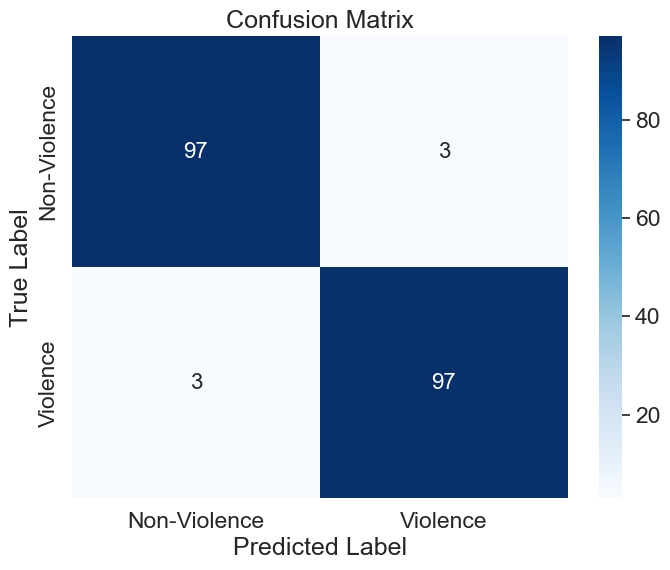

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Increase font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, 
            xticklabels=['Non-Violence', 'Violence'], yticklabels=['Non-Violence', 'Violence'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[97  3]
 [ 3 97]]
Classification Report:
              precision    recall  f1-score   support

Non-Violence       0.97      0.97      0.97       100
    Violence       0.97      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Matthews Correlation Coefficient: 0.94
ROC AUC Score: 0.9973


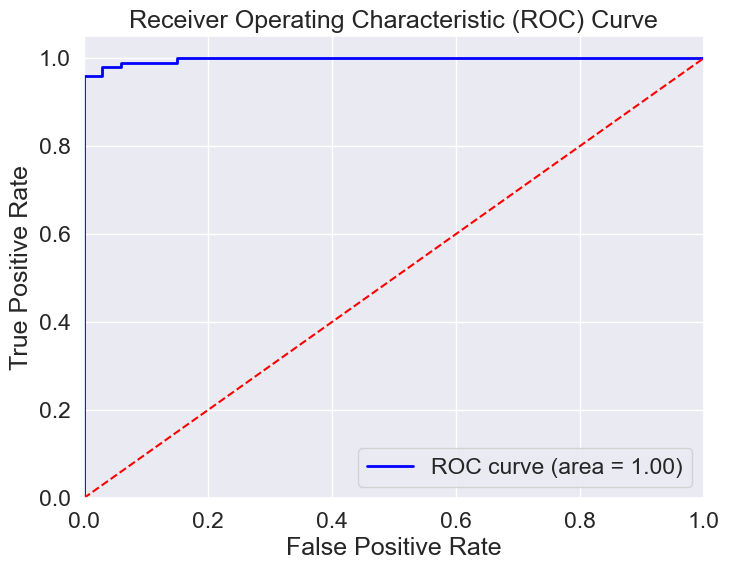

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, matthews_corrcoef

# Assuming test_labels_encoded contains the original results and y_pred_binary contains the predicted results

# Accuracy
accuracy = accuracy_score(test_labels_encoded, y_pred_binary)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(test_labels_encoded, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(test_labels_encoded, y_pred_binary)
print("Recall:", recall)

# F1 Score
f1 = f1_score(test_labels_encoded, y_pred_binary)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(test_labels_encoded, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(test_labels_encoded, y_pred_binary, target_names=['Non-Violence', 'Violence'])
print("Classification Report:")
print(report)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(test_labels_encoded, y_pred_binary)
print("Matthews Correlation Coefficient:", mcc)

# ROC AUC Score and Curve
roc_auc = roc_auc_score(test_labels_encoded, y_pred_prob)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(test_labels_encoded, y_pred_prob)
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
